### General statistics of the past Gitcoin rounds
- Basic numbers
- Daily statistics of counts and amounts
- Wallet activity distributions

In [1]:
# Read dataset
df = pd.read_csv('data/data_rounds.csv')
df['day'] = pd.to_datetime(df.created_dt).dt.date
print(df.shape)
df[:2]

(753275, 9)


,round_name,source_wallet,destination_wallet,created_ts,created_dt,amt_usd,amt_token,token,day
0,1_gitcoin_gr15,0x76f69dcddd0593b0aff5fd3280c3433ddb68e0d2,id_12,1663891197,2022-09-22 23:59:57,0.06,0.00,ETH,2022-09-22
1,1_gitcoin_gr15,0x76f69dcddd0593b0aff5fd3280c3433ddb68e0d2,id_6972,1663891195,2022-09-22 23:59:55,1.28,0.00,ETH,2022-09-22


In [2]:
# Basic stat
df1 = df.groupby('round_name').agg({
    'source_wallet': lambda x: len(set(x)),
    'destination_wallet': lambda x: len(set(x)),
    'amt_usd': [len, sum],    
})
df1.columns = [
    'Number of donors',
    'Number of projects',
    'Number of votes',
    'Donated sum'
]
df1['Average number of votes per donor'] = df1['Number of votes']/df1['Number of donors']
df1['Average sum per donor'] = df1['Donated sum']/df1['Number of donors']
df1

,Number of donors,Number of projects,Number of votes,Donated sum,Average number of votes per donor,Average sum per donor
round_name,,,,,,
1_gitcoin_gr15,58409,1482,453861,"1,291,970.99",7.77,22.12
2_unicef,15510,10,64180,"96,996.17",4.14,6.25
3_fantom,16344,88,139337,"74,703.95",8.53,4.57
41_gitcoin_climate,3399,66,10462,"46,142.25",3.08,13.58
42_gitcoin_ethereum,2901,24,12022,"54,137.19",4.14,18.66
43_gitcoin_oss,11706,89,73413,"253,287.92",6.27,21.64


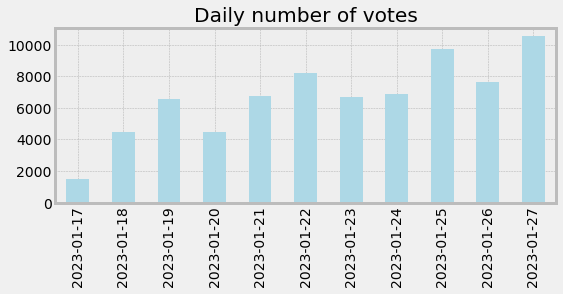

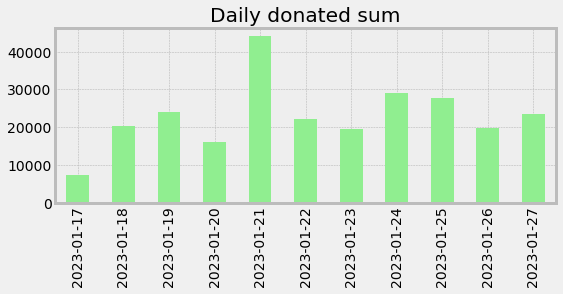

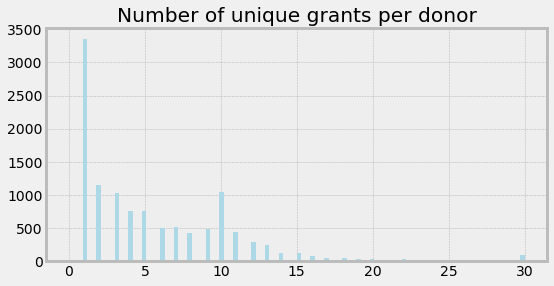

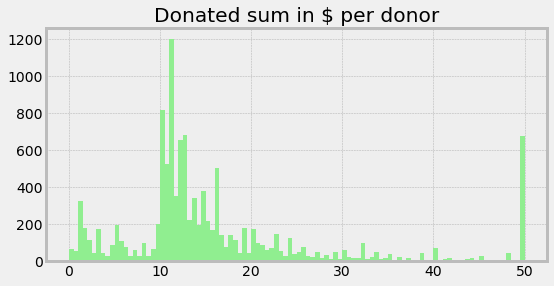

In [3]:
# Plotting
plt.style.use('bmh')
feat_round = '43_gitcoin_oss'
filt = df.round_name == feat_round

###
df1 = df[filt].groupby('day').agg({
    'amt_usd':sum,
    'source_wallet':len,
    'destination_wallet': lambda x: len(set(x)),
})
df1.columns = ['amt','cnt','cnt_uniq']
p = df1.cnt.plot(kind = 'bar', figsize = (8,3), xlabel = '', title = 'Daily number of votes', color = 'lightblue')
plt.savefig(f'presentation/pictures/{feat_round}_1.png', bbox_inches='tight')
plt.show()
p = df1.amt.plot(kind = 'bar', figsize = (8,3), xlabel = '', title = 'Daily donated sum', color = 'lightgreen')
plt.savefig(f'presentation/pictures/{feat_round}_2.png', bbox_inches='tight')
plt.show()

###
df1 = df[filt].groupby('source_wallet').agg({
    'amt_usd':sum,
    'destination_wallet': [len, lambda x: len(set(x))],
})
df1.columns = ['amt','cnt','cnt_uniq']
p = df1.cnt_uniq.clip(upper = 30).hist(range = (0,30), bins = 100, figsize = (8,4), color = 'lightblue')
_ = p.set_title('Number of unique grants per donor')
plt.savefig(f'presentation/pictures/{feat_round}_3.png', bbox_inches='tight')
plt.show()
p = df1.amt.clip(upper = 50).hist(range = (0,50), bins = 100, figsize = (8,4), color = 'lightgreen')
_ = p.set_title('Donated sum in $ per donor')
plt.savefig(f'presentation/pictures/{feat_round}_4.png', bbox_inches='tight')
plt.show()